# 1. Zbiór danych
<p>
Zbiór danych dotyczący zdatności wody do picia. Zawiera 20 cech, które przedstawiają zawartość poszczególnych związków chemicznych, pierwiastków i mikroorganizmów oraz cechę określającą zdatność do spożycia.
</p>
https://www.kaggle.com/mssmartypants/water-quality

## Wczytanie zbioru

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/waterQuality1.csv', delimiter=',')
data = data[data.is_safe != '#NUM!']
data = data[data.ammonia != '#NUM!']
data['ammonia'] = pd.to_numeric(data['ammonia'])
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Usuwanie losowych wartości

In [ ]:
for index, row in data.iterrows():
    if index % 10 == 0:
        random_col = np.random.choice(data.columns)
        data.at[index, random_col] = np.nan

## Zastąpienie brakujących wartości średnią

In [ ]:
means = data.mean(axis=0)
for index, value in means.items():
    data[index].fillna(value=value, inplace=True)

## Zastąpienie brakujących wartości medianą

In [ ]:
medians = data.median(axis=0)
for index, value in medians.items():
    data[index].fillna(value=value, inplace=True)

## Zastąpienie najczęściej występujacą wartością

In [ ]:
value = data['is_safe'].value_counts().idxmax()
data['is_safe'].fillna(value=value, inplace=True)

# 2. Statystyki opisowe i podsumowujące

In [ ]:
data.describe()

In [ ]:
data.info()

## Zależności między zmiennymi
Scatter ploty między każdą parą zmiennych. Na przekątnej wykres gęstości prawdopodobieństwa (rozkład) zmiennej.

In [ ]:
import seaborn as sns

sns.pairplot(data)
plt.show()

#### Zmiennej podejrzane o relacje

In [ ]:
sns.pairplot(data[['bacteria', 'viruses']])
plt.show()

## Tabela korelacji

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(16, 9), dpi=80)

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Histogramy

In [ ]:
print(data.columns)

data.hist(figsize=(30, 30))
plt.show()

Zmiennej podejrzane o relacje

In [ ]:
sns.pairplot(data[['bacteria', 'viruses']])
plt.show()

## Boxploty

In [ ]:
data.boxplot(figsize=(30, 15))
plt.show()

#### Odfiltrowanie wartości odstających

In [2]:
from scipy import stats
filtered = data[(np.abs(stats.zscore(data['aluminium'])) < 3)]
filtered = filtered[(np.abs(stats.zscore(filtered['arsenic'])) < 3)]
filtered = filtered[(np.abs(stats.zscore(filtered['nitrites'])) < 3)]

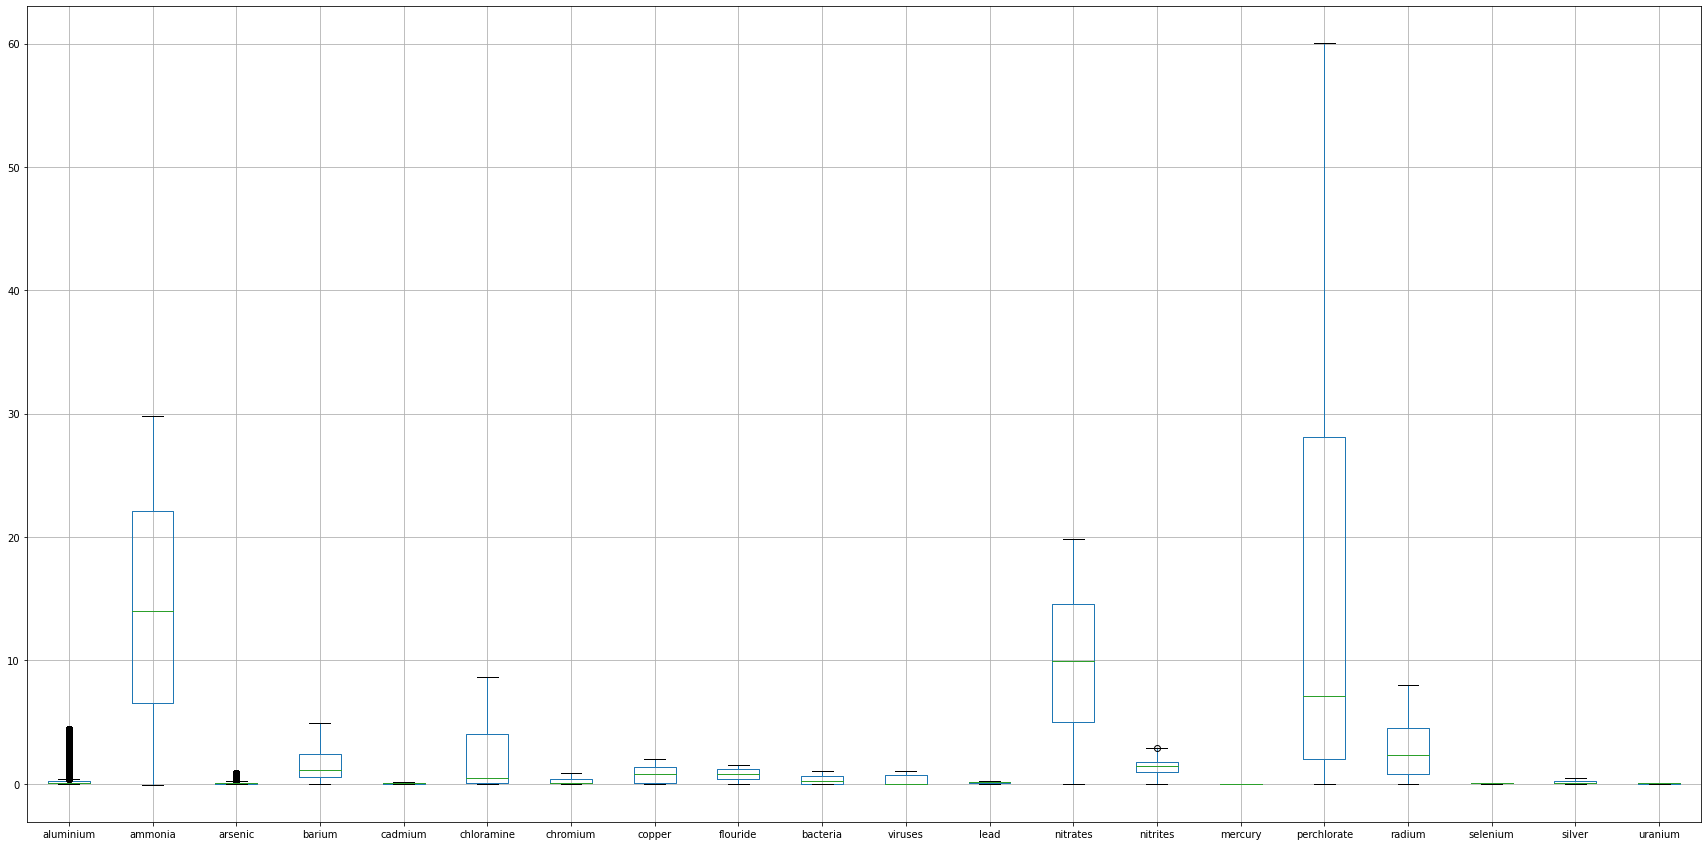

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7599 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7599 non-null   float64
 1   ammonia      7599 non-null   float64
 2   arsenic      7599 non-null   float64
 3   barium       7599 non-null   float64
 4   cadmium      7599 non-null   float64
 5   chloramine   7599 non-null   float64
 6   chromium     7599 non-null   float64
 7   copper       7599 non-null   float64
 8   flouride     7599 non-null   float64
 9   bacteria     7599 non-null   float64
 10  viruses      7599 non-null   float64
 11  lead         7599 non-null   float64
 12  nitrates     7599 non-null   float64
 13  nitrites     7599 non-null   float64
 14  mercury      7599 non-null   float64
 15  perchlorate  7599 non-null   float64
 16  radium       7599 non-null   float64
 17  selenium     7599 non-null   float64
 18  silver       7599 non-null   float64
 19  uraniu

In [4]:
filtered.boxplot(figsize=(30, 15))
plt.show()
filtered.info()

# 3. Skalowanie cech

In [3]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']])
data_scaled = scaler.transform(filtered[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']])

data_scaled = pd.DataFrame(np.append(data_scaled, filtered[['is_safe']].to_numpy(), axis=1), dtype=float)
data_scaled.columns = data.columns

In [ ]:
data_scaled.boxplot(figsize=(30, 9))
plt.show()
data_scaled.describe()
data.info()

# 4. Redukcja wymiarowości
### Podział train-test

In [4]:
from sklearn.model_selection import train_test_split

X = data_scaled.loc[:, data_scaled.columns[:-1]].values
y = data_scaled.loc[:,['is_safe']].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_train.shape, y_test.shape
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([5402,  677]))

### Selekcja cech
#### Sequenential Forward/Backward Selection

Możliwe metryki: (jeżeli nie podana, wybierana jest domyślna metryka z podanego kalsyfikatora, można też napisać własną funkcję score'ującą)

In [7]:
from sklearn import metrics

In [5]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # przykładowy klasyfikator

sfs = SequentialFeatureSelector(
    knn,                           # klasyfikator
    n_features_to_select=18,       # liczba oczekwianych cech
    direction='forward',           # 'backward' || 'forward'
    scoring=None)  # metoda obliczania jakości modelu

sfs.fit(X_train, y_train)
reduced = sfs.transform(X_train)
reduced.shape, sfs.get_support()

((6079, 18),
 array([ True,  True,  True, False,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]))

### Ekstrakcja cech
#### Algorytm PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=18)
pca.fit(X_train)
principalComponents = pca.transform(X_train)
principalComponents.shape, pca.explained_variance_ratio_.sum()

((6079, 18), 0.9681504521288489)

# 5. Modele decyzyjne

## Generowanie próbek brakującej klasy

In [10]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_OS, y_train_OS = oversample.fit_resample(X_train, y_train)

principalComponents_OS = pca.transform(X_train_OS)
reduced_OS = sfs.transform(X_train_OS)

In [24]:
print(np.unique(y_train_OS, return_counts=True),
pd.DataFrame(y_train_OS).describe())

(array([0., 1.]), array([5402, 5402]))                   0
count  10804.000000
mean       0.500000
std        0.500023
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000


In [13]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Regresja logistyczna

PCA:  (0.9157894736842105, 0.47967479674796754)


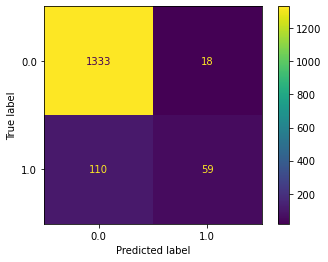

PCA+oversampling:  (0.7907894736842105, 0.4381625441696113)


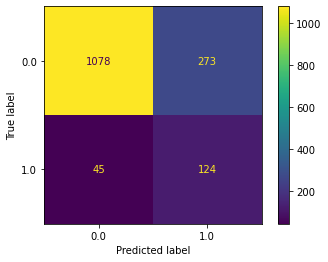

SFS:  (0.9164473684210527, 0.4980237154150199)


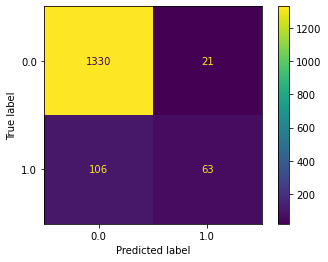

SFS+oversampling:  (0.8, 0.43911439114391143)


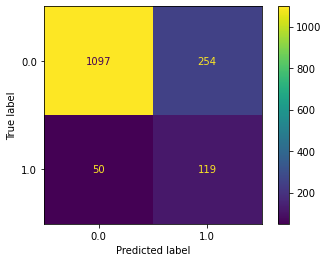

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from warnings import simplefilter
from sklearn import tree

simplefilter(action='ignore', category=FutureWarning)

#PCA
lr = LogisticRegression(random_state=0).fit(principalComponents, y_train)
X_test_transformed = pca.transform(X_test)
y_pred = lr.predict(X_test_transformed)
result = metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred)
print('PCA: ', result)
metrics.plot_confusion_matrix(lr, X_test_transformed, y_test)
plt.show()

#PCA + oversampling
lr = LogisticRegression(random_state=0).fit(principalComponents_OS, y_train_OS)
X_test_transformed = pca.transform(X_test)
y_pred = lr.predict(X_test_transformed)
result = metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred)
print('PCA+oversampling: ', result)
metrics.plot_confusion_matrix(lr, X_test_transformed, y_test)
plt.show()

#SFS
lr = LogisticRegression(random_state=0).fit(reduced, y_train)
X_test_reduced = sfs.transform(X_test)
y_pred = lr.predict(X_test_reduced)
result = metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred)
print('SFS: ', result)
metrics.plot_confusion_matrix(lr, X_test_reduced, y_test)
plt.show()

#SFS + oversampling
lr = LogisticRegression(random_state=0).fit(reduced_OS, y_train_OS)
X_test_reduced = sfs.transform(X_test)
y_pred = lr.predict(X_test_reduced)
result = metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred)
print('SFS+oversampling: ', result)
metrics.plot_confusion_matrix(lr, X_test_reduced, y_test)
plt.show()

### Walidacja krzyżowa

In [26]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(random_state=0)
XX = pca.transform(X)
accuracy = cross_val_score(lr, XX, y, cv=10, scoring='accuracy')
f1 = cross_val_score(lr, XX, y, cv=10, scoring='f1')

print("Srednia skutecznosc:", accuracy.mean(), f1.mean())

Srednia skutecznosc: 0.874327196449622 0.3360094057251226


## Algroytm k-najbliższych sąsiadów

PCA: 0.9052631578947369 0.4330708661417323


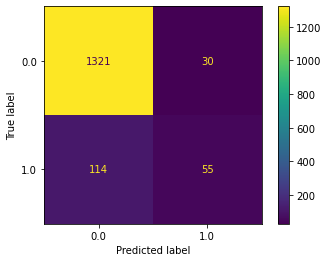

PCA+oversampling: 0.7973684210526316 0.4671280276816609


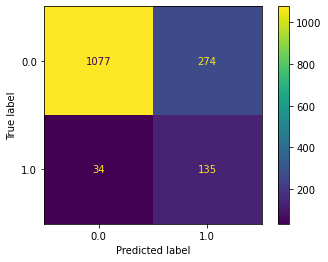

SFS: 0.9125 0.49429657794676807


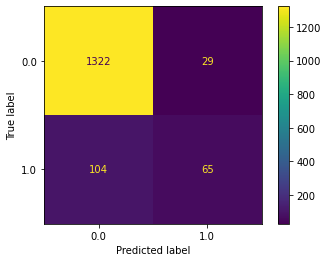

SFS + oversampling: 0.8052631578947368 0.48432055749128916


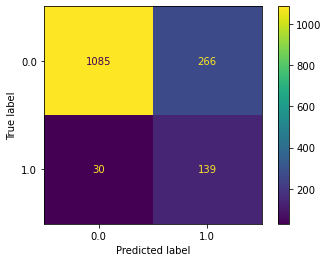

In [28]:
from sklearn.neighbors import KNeighborsClassifier

#PCA
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(principalComponents, y_train)
X_test_transformed = pca.transform(X_test)
y_pred = neigh.predict(X_test_transformed)

print("PCA:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(neigh, X_test_transformed, y_test)
plt.show()

#PCA + oversampling
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(principalComponents_OS, y_train_OS)
X_test_transformed = pca.transform(X_test)
y_pred = neigh.predict(X_test_transformed)

print("PCA+oversampling:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(neigh, X_test_transformed, y_test)
plt.show()



#SFS
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(reduced, y_train)
X_test_reduced = sfs.transform(X_test)
y_pred = neigh.predict(X_test_reduced)

print("SFS:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(neigh, X_test_reduced, y_test)
plt.show()

#SFS + oversampling
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(reduced_OS, y_train_OS)
X_test_reduced = sfs.transform(X_test)
y_pred = neigh.predict(X_test_reduced)

print("SFS + oversampling:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(neigh, X_test_reduced, y_test)
plt.show()

### Walidacja krzyżowa

In [29]:
kneigh = KNeighborsClassifier(n_neighbors=5)
XX = sfs.transform(X)
accuracy = cross_val_score(kneigh, XX, y, cv=10, scoring='accuracy')
f1 = cross_val_score(kneigh, XX, y, cv=10, scoring='f1')

print("Srednia skutecznosc:", accuracy.mean(), f1.mean())

Srednia skutecznosc: 0.880643852714791 0.40718673745051337


## Maszyna wektorów nośnych

PCA: 0.9361842105263158 0.6283524904214559


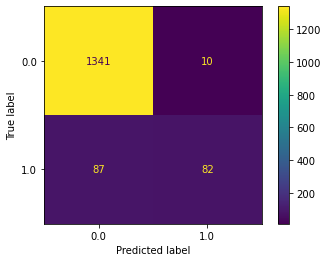

PCA + balanced: 0.8809210526315789 0.5914221218961625


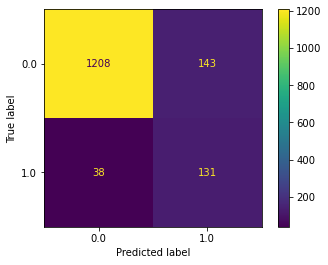

PCA + oversampling: 0.8855263157894737 0.6063348416289592


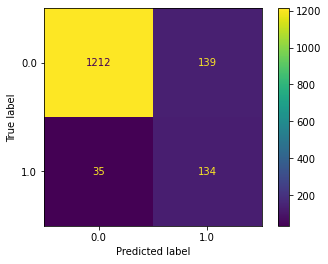

SFS: 0.9381578947368421 0.6356589147286822


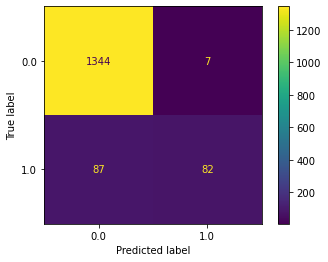

SFS + balanced: 0.8789473684210526 0.5929203539823009


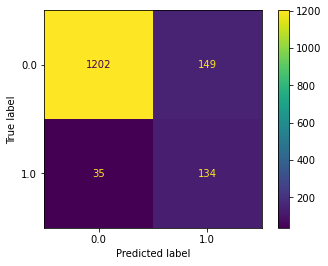

SFS + oversampling: 0.8881578947368421 0.6100917431192662


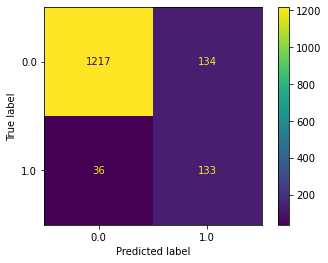

In [30]:
from sklearn.svm import SVC

kernel = 'poly' # rbf
max_iter = 12000

#PCA
svc = SVC(max_iter=max_iter, kernel=kernel)
svc.fit(principalComponents, y_train)
X_test_transformed = pca.transform(X_test)
y_pred = svc.predict(X_test_transformed)

print("PCA:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(svc, X_test_transformed, y_test)
plt.show()

#PCA + balanced
svc = SVC(class_weight='balanced', kernel=kernel, max_iter=max_iter)
svc.fit(principalComponents, y_train)
X_test_transformed = pca.transform(X_test)
y_pred = svc.predict(X_test_transformed)

print("PCA + balanced:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(svc, X_test_transformed, y_test)
plt.show()

#PCA + oversampling
svc = SVC(max_iter=max_iter, kernel=kernel)
svc.fit(principalComponents_OS, y_train_OS)
X_test_transformed = pca.transform(X_test)
y_pred = svc.predict(X_test_transformed)

print("PCA + oversampling:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(svc, X_test_transformed, y_test)
plt.show()



#SFS
svc =  SVC(max_iter=max_iter, kernel=kernel)
svc.fit(reduced, y_train)
X_test_reduced = sfs.transform(X_test)
y_pred = svc.predict(X_test_reduced)

print("SFS:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(svc, X_test_reduced, y_test)
plt.show()

#SFS + balanced
svc =  SVC(class_weight='balanced', max_iter=max_iter, kernel=kernel)
svc.fit(reduced, y_train)
X_test_reduced = sfs.transform(X_test)
y_pred = svc.predict(X_test_reduced)

print("SFS + balanced:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(svc, X_test_reduced, y_test)
plt.show()


#SFS + oversampling
svc =  SVC(class_weight='balanced', max_iter=max_iter, kernel=kernel)
svc.fit(reduced_OS, y_train_OS)
X_test_reduced = sfs.transform(X_test)
y_pred = svc.predict(X_test_reduced)

print("SFS + oversampling:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(svc, X_test_reduced, y_test)
plt.show()

### Walidacja krzyżowa

In [31]:
svc = SVC(max_iter=max_iter, kernel=kernel)
XX = sfs.transform(X)
accuracy = cross_val_score(svc, XX, y, cv=10, scoring='accuracy')
f1 = cross_val_score(svc, XX, y, cv=10, scoring='f1')

print("Srednia skutecznosc:", accuracy.mean(), f1.mean())

Srednia skutecznosc: 0.8936696484293739 0.46424253561963164


## Drzewo decyzyjne

PCA: 0.8782894736842105 0.4606413994169096


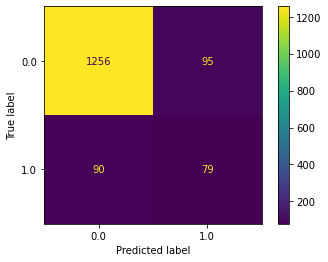

PCA + oversampling: 0.8723684210526316 0.515


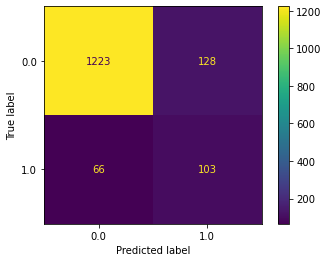

SFS: 0.9598684210526316 0.809968847352025


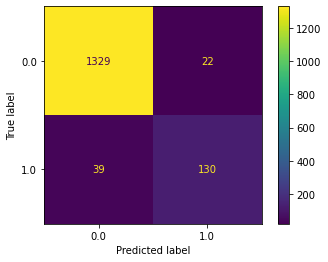

SFS + oversampling: 0.9473684210526315 0.7647058823529411


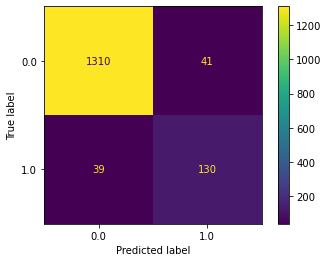

In [34]:
from warnings import simplefilter
from sklearn import tree

simplefilter(action='ignore', category=FutureWarning)

#PCA
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(principalComponents, y_train)
X_test_transformed = pca.transform(X_test)
y_pred = dt.predict(X_test_transformed)

print("PCA:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(dt, X_test_transformed, y_test)
plt.show()

#PCA + oversampling
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(principalComponents_OS, y_train_OS)
X_test_transformed = pca.transform(X_test)
y_pred = dt.predict(X_test_transformed)

print("PCA + oversampling:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(dt, X_test_transformed, y_test)
plt.show()



#SFS
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(reduced, y_train)
X_test_reduced = sfs.transform(X_test)
y_pred = dt.predict(X_test_reduced)

print("SFS:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(dt, X_test_reduced, y_test)
plt.show()

#SFS + oversampling
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(reduced_OS, y_train_OS)
X_test_reduced = sfs.transform(X_test)
y_pred = dt.predict(X_test_reduced)

print("SFS + oversampling:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(dt, X_test_reduced, y_test)
plt.show()

### Walidacja krzyżowa

In [35]:
dt = tree.DecisionTreeClassifier(random_state=0)
XX = sfs.transform(X)
accuracy = cross_val_score(dt, XX, y, cv=10, scoring='accuracy')
f1 = cross_val_score(dt, XX, y, cv=10, scoring='f1')

print("Srednia skutecznosc:", accuracy.mean(), f1.mean())

Srednia skutecznosc: 0.8364295125164691 0.5344881768065199


### Podsumowanie
Najlepszy model pod względem accuracy score i F1 score: Decission tree + SFS 


# 6. Uczenie zespołowe

## Las losowy

PCA: 0.9223684210526316 0.48695652173913045


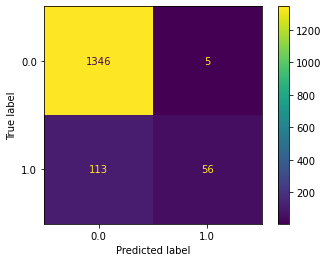

SFS: 0.9605263157894737 0.7959183673469388


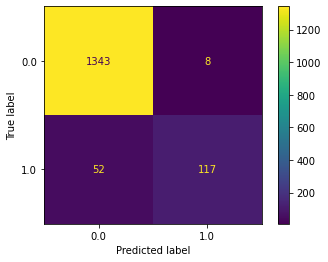

In [36]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100
max_depth = 10
criterion = 'entropy' # gini, entropy

#PCA
forest = RandomForestClassifier(n_estimators, criterion=criterion, max_depth=max_depth, random_state=42)
forest.fit(principalComponents, y_train)
X_test_transformed = pca.transform(X_test)
y_pred = forest.predict(X_test_transformed)

print("PCA:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(forest, X_test_transformed, y_test)
plt.show()

#SFS
forest = RandomForestClassifier(n_estimators, criterion=criterion, max_depth=max_depth, random_state=42)
forest.fit(reduced, y_train)
X_test_reduced = sfs.transform(X_test)
y_pred = forest.predict(X_test_reduced)

print("SFS:", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(forest, X_test_reduced, y_test)
plt.show()


In [38]:
forest = RandomForestClassifier(n_estimators, criterion=criterion, max_depth=max_depth, random_state=42)
XX = pca.transform(X)
accuracy = cross_val_score(forest, XX, y, cv=10, scoring='accuracy')
f1 = cross_val_score(forest, XX, y, cv=10, scoring='f1')

print("Srednia skutecznosc:", accuracy.mean(), f1.mean())

Srednia skutecznosc: 0.8848538589556897 0.34994470828539337


In [39]:
forest = RandomForestClassifier(n_estimators, criterion=criterion, max_depth=max_depth, random_state=42)
XX = sfs.transform(X)
accuracy = cross_val_score(forest, XX, y, cv=10, scoring='accuracy')
f1 = cross_val_score(forest, XX, y, cv=10, scoring='f1')

print("Srednia skutecznosc:", accuracy.mean(), f1.mean())

Srednia skutecznosc: 0.9106433326399003 0.5807593733186243


## Voting classifier

Dokładność:  0.9539473684210527 0.75177304964539


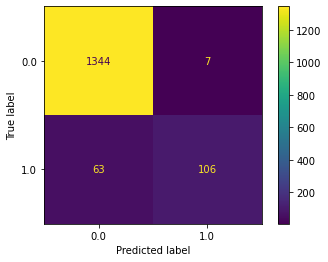

In [40]:
from sklearn.ensemble import VotingClassifier


voting = 'soft'
weights = [1, 2, 2] # soft: 1,2,2; 1,1,1; 2,1,1; 1,2,1; 2,1,1;

lr = LogisticRegression(random_state=0)
svc =  SVC(max_iter=max_iter, kernel=kernel, probability=True, random_state=0)
dt = tree.DecisionTreeClassifier(random_state=0)

voting = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('dt', dt)], voting=voting, weights=weights)
voting.fit(reduced, y_train)

X_test_reduced = sfs.transform(X_test)
y_pred = voting.predict(X_test_reduced)

print("Dokładność: ", metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(voting, X_test_reduced, y_test)
plt.show()

In [43]:
lr = LogisticRegression(random_state=0)
svc =  SVC(max_iter=max_iter, kernel=kernel, probability=True, random_state=0)
dt = tree.DecisionTreeClassifier(random_state=0)

voting = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('dt', dt)], voting='soft', weights=[1,2,2])
XX = sfs.transform(X)
accuracy = cross_val_score(voting, XX, y, cv=10, scoring='accuracy')
f1 = cross_val_score(voting, XX, y, cv=10, scoring='f1')


print("Srednia skutecznosc:", accuracy.mean(), f1.mean())

Srednia skutecznosc: 0.8957747382289716 0.5487294465655291


# 7. Opytmalizacja modelu

## Grid search

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[i for i in range(50,250,50)], 'criterion':('gini', 'entropy'), 'max_depth':[i for i in range(4,12,3)], 'class_weight':('balanced', 'balanced_subsample')}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters, verbose=2, n_jobs=12)
clf.fit(reduced, y_train)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_class_weight',
 'param_criterion',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

0.9565789473684211 0.8081395348837209


/usr/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


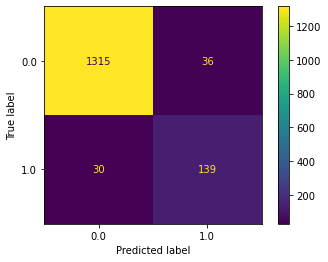

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, n_estimators=50)

In [23]:
X_test_reduced = sfs.transform(X_test)
y_pred = clf.predict(X_test_reduced)

print( metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(clf, X_test_reduced, y_test)
plt.show()
clf.best_estimator_

## Algorytmy genetyczne

In [12]:
from deap import base
from deap import creator
from deap import tools

import random

from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

import multiprocessing

def RfcParameters(icls):
    genome = list()
    # n_estimators
    genome.append(random.randint(50, 100))
    # max_depth
    genome.append(random.uniform(0.1,10))
    # min_samples_split
    genome.append(random.randint(2, 100))
    # min_samples_leaf
    genome.append(random.randint(2, 100))
    # max_leaf_nodes
    genome.append(random.randint(2, 20))
    return icls(genome)
    
def RfcParametersFitness(y, df, individual):
    split = 5
    cv = model_selection.StratifiedKFold(n_splits=split)
    
    mms = MinMaxScaler()
    df_norm = mms.fit_transform(df)
    estimator = RandomForestClassifier(n_estimators=individual[0], max_depth=individual[1], min_samples_split=individual[2], min_samples_leaf=individual[3], max_leaf_nodes=individual[4], random_state=0)
    
    resultSum = 0
    
    for train, test in cv.split(df_norm, y):
        estimator.fit(df_norm[train], y[train])
        predicted = estimator.predict(df_norm[test])
        expected = y[test]
        tn, fp, fn, tp = metrics.confusion_matrix(expected, predicted).ravel()
        # recall = tp/(tp + fn) 
        # precision = tp/(tp + fp)
        # f1 = 2*precision*recall/(precision+recall)
        # f1 = tp/(tp + 0.5*(fp + fn))
        B = 2
        factor = (1+B*B)*tp
        fB = factor/(factor + B*B*fn + fp)
        resultSum = resultSum + fB # zbieramy wyniki z poszczególnych etapów walidacji krzyżowej

    return resultSum / split,

In [15]:
sizePopulation = 20
probabilityMutation = 0.2
probabilityCrossover = 0.8
numberIteration = 20
numberElitism = 10
processes = 12

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

pool = multiprocessing.Pool(processes=processes)
toolbox.register("map", pool.map)

toolbox.register('individual', RfcParameters, creator.Individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", RfcParametersFitness,y_train, reduced)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)

pop = toolbox.population(n=sizePopulation)
fitnesses = list(toolbox.map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit    

/home/irek/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/irek/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


 20
Gen 20, Best individual is [96, 6.787860072849839, 70, 29, 16], (0.6003153496766103,) in 370.9587540626526 s


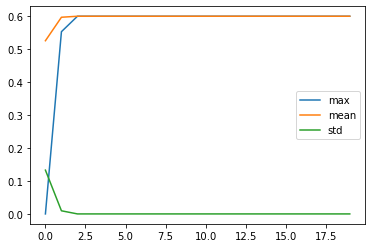

In [16]:
import time

data = []

g = 0
start=time.time()
while g < numberIteration:
    g = g+1
    print("\r", g, end='')
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))
    listElitism = []
    for x in range(0, numberElitism):
        listElitism.append(tools.selBest(pop, 1)[0])

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < probabilityCrossover:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
            
    # for mutant in offspring:
    #     if random.random() < probabilityMutation:
    #         toolbox.mutate(mutant)
    #         del mutant.fitness.values
    
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    pop[:] = offspring + listElitism
    fits = [ind.fitness.values[0] for ind in pop]

    row = []
    length = len(pop)
    mean = sum(fits) / length
    sum2 = sum(x * x for x in fits)
    std = abs(sum2 / length - mean ** 2) ** 0.5
    row.append(min(fits))
    row.append(mean)
    row.append(std)
    data.append(row)
    best_ind = tools.selBest(pop, 1)[0]
    
end = time.time()
print("\nGen %s, Best individual is %s, %s in %s s" % (g, best_ind, best_ind.fitness.values,(end-start)))

data = np.array(data)
plt.plot(data[:,0], label='max')
plt.plot(data[:,1], label='mean')
plt.plot(data[:,2], label='std')
plt.legend()
plt.show()

### Maksymalizacja recall

0.9407894736842105 0.6564885496183206


/usr/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


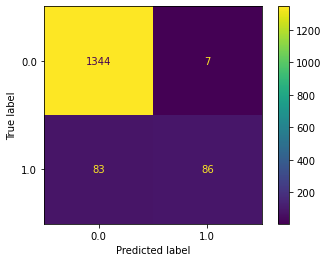

In [56]:
# populacja=20 iteracji=20
rf = RandomForestClassifier(n_estimators=75, max_depth=8.384724325391684, min_samples_split=73, min_samples_leaf=35, max_leaf_nodes=19) 
rf.fit(reduced, y_train)

X_test_reduced = sfs.transform(X_test)
y_pred = rf.predict(X_test_reduced)

print( metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(rf, X_test_reduced, y_test)
plt.show()

### Maksymalizacja fB score, B=2
B - ile razy ważniejszy jest recall od precision

0.9407894736842105 0.6590909090909091


/usr/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


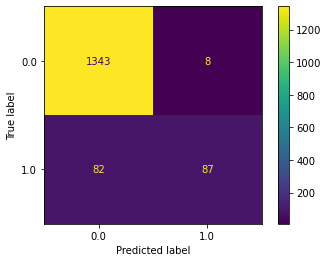

In [18]:
# populacja=20, iteracji=20
rf = RandomForestClassifier(n_estimators=96, max_depth=6.787860072849839, min_samples_split=70, min_samples_leaf=29, max_leaf_nodes=16) 
rf.fit(reduced, y_train)

X_test_reduced = sfs.transform(X_test)
y_pred = rf.predict(X_test_reduced)

print( metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred) )
metrics.plot_confusion_matrix(rf, X_test_reduced, y_test)
plt.show()